In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('Wine_clust.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.shape

(178, 13)

In [5]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
data.isnull().sum() #checking for null values

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [9]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Clustering Models
1) K-means clustering
2) Hierarchical clustering
3) DBSCAN clustering

In [10]:
#K-means clustering

C:\Users\Aparna.DESKTOP-R4D5RJ8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


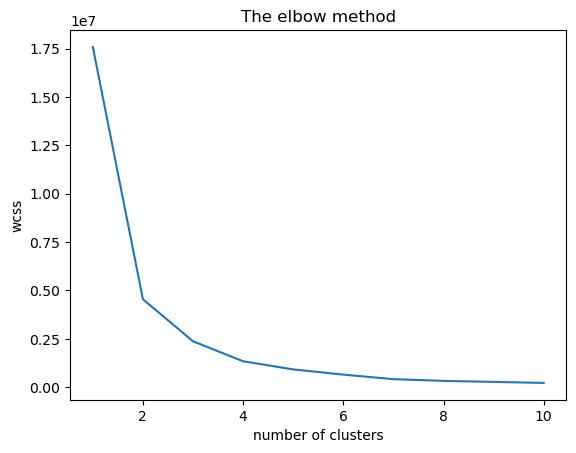

In [11]:
# Determine the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters =i , init= 'k-means++' , random_state =42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
# Plot the WCSS values    
plt.plot(range(1,11) , wcss)
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [12]:
# Fit the K-Means model to the data with the optimum number of cluster
kmeans = KMeans(n_clusters =3 , init= 'k-means++' , random_state =42)

In [13]:
y_means = kmeans.fit_predict(data)

In [14]:
y_means

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

### silhouette score

In [15]:
from sklearn.metrics import silhouette_score #it's an evaluation matrix
sil_avg =silhouette_score(data, y_means)
sil_avg

0.571138193786884

In [16]:
#2) # Perform hierarchical clustering

In [17]:
# dendrogram

In [18]:
import scipy.cluster.hierarchy as sch

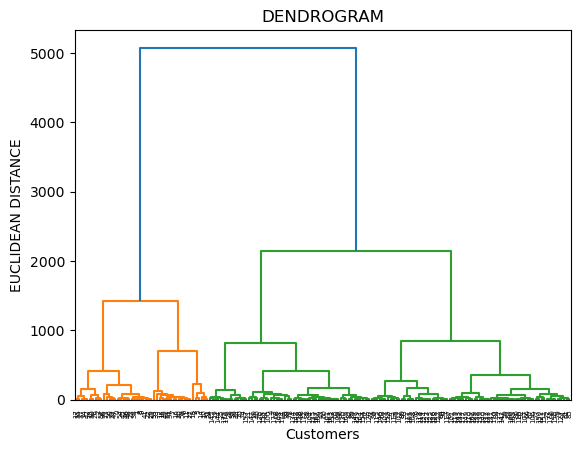

In [19]:
dendrogram = sch.dendrogram(sch.linkage(data , method = "ward"))
plt.title ("DENDROGRAM")
plt.xlabel("Customers")
plt.ylabel("EUCLIDEAN DISTANCE")
plt.show()

#### optimal no of clusters = 3

In [20]:
#Agglomerative Hierarchical Clustering

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
hc = AgglomerativeClustering (n_clusters = 3 , affinity ='euclidean' , linkage ='ward')
y_hc = hc.fit_predict(data)

In [23]:
y_hc

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

In [24]:
#Silhoutte score

In [25]:
sil_avg =silhouette_score(data , y_hc)

sil_avg

0.5644796401732071

In [26]:
#DBSCAN

In [27]:
from sklearn.cluster import DBSCAN
# fit a DBSCAN model to the data
model = DBSCAN(eps=2, min_samples=5)
model.fit(data)

# extract the cluster labels and add them as a new column in the DataFrame
data["cluster"] = model.labels_

# inspect the number of clusters and data points in each cluster
print("Number of clusters:", len(set(model.labels_)))
for label in set(model.labels_):
    print("Cluster", label, ":", sum(data["cluster"] == label))


Number of clusters: 1
Cluster -1 : 178


In [28]:
model = DBSCAN(eps=1, min_samples=2)
labels = model.fit_predict(data)

# Compute the Silhouette Score
silhouette_score = silhouette_score(data, labels, metric='euclidean')
print("Silhouette Score: {:.4f}".format(silhouette_score))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

#### Number of labels is 1.Valid values are 2 to n_samples - 1 (inclusive).So silhouette score can't find 

#### Better model with silhouette score is 0.577 which is k-means clustering

## Scaling data using MinMaxScaler

In [29]:
from sklearn.preprocessing import MinMaxScaler

# Create the MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your data and transform the data
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)


In [30]:
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.0
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.0
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.0
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.0
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


C:\Users\Aparna.DESKTOP-R4D5RJ8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


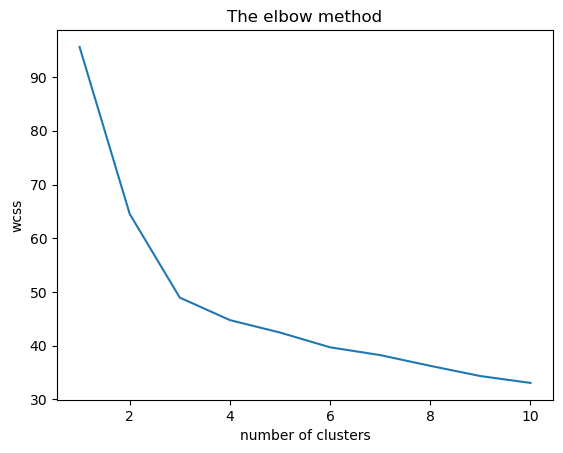

In [31]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters =i , init= 'k-means++' , random_state =42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11) , wcss)
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [32]:
kmeans = KMeans(n_clusters =3 , init= 'k-means++' , random_state =42)

y_means = kmeans.fit_predict(scaled_data)

y_means

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [33]:
from sklearn.metrics import silhouette_score #it's an evaluation matrix
sil_avg =silhouette_score(scaled_data, y_means)
sil_avg

0.3008938518500134

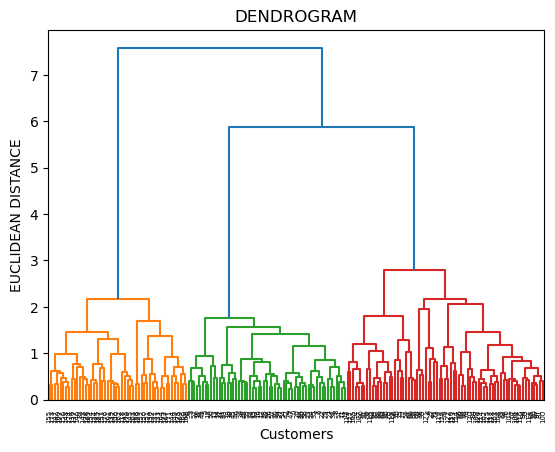

In [34]:
# dendrogram

import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(scaled_data , method = "ward"))
plt.title ("DENDROGRAM")
plt.xlabel("Customers")
plt.ylabel("EUCLIDEAN DISTANCE")
plt.show()

In [35]:
#optimal no of clusters = 3

In [36]:
#Agglomerative Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering (n_clusters = 3 , affinity ='euclidean' , linkage ='ward')
y_hc = hc.fit_predict(scaled_data)

y_hc

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [37]:
#Silhoutte score

sil_avg =silhouette_score(scaled_data , y_hc)

sil_avg

0.2948290632158541

In [38]:
#DBSCAN

from sklearn.cluster import DBSCAN
# fit a DBSCAN model to the data
model = DBSCAN(eps=2, min_samples=5)
model.fit(scaled_data)

# extract the cluster labels and add them as a new column in the DataFrame
data["cluster"] = model.labels_

# inspect the number of clusters and data points in each cluster
print("Number of clusters:", len(set(model.labels_)))
for label in set(model.labels_):
    print("Cluster", label, ":", sum(scaled_data["cluster"] == label))


Number of clusters: 1
Cluster 0 : 178


In [39]:
model = DBSCAN(eps=1, min_samples=2)
labels = model.fit_predict(scaled_data)

# Compute the Silhouette Score
silhouette_score = silhouette_score(scaled_data, labels, metric='euclidean')
print("Silhouette Score: {:.4f}".format(silhouette_score))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

#### Number of labels is 1.Valid values are 2 to n_samples - 1 (inclusive).So silhouette score can't find 

### In conclusion, the results of our analysis indicate that the use of MinMax scaling in our clustering solution has a negative impact on the quality of our solution as measured by the Silhouette Score. Without scaling, the Silhouette Score was much higher, indicating a better clustering solution.